<a href="https://colab.research.google.com/github/SitiZumarohdf/PCVK_Genap_2023/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Membuat fungsi konvolusi

##Konvolusi tanpa library


**Membuat Fungsi Konvolusi**

Fungsi konvolusi yang dibuat memiliki parameter berupa citra masukan, kernel berupa matriks untuk memfilter citra, nilai stride/ besarnya pergeseran untuk setiap konvolusi, dan nilai pada yang akan ditambahkan pada citra

In [3]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image 

d. Load citra yang akan diproses dan ubah menjadi citra keabuan 


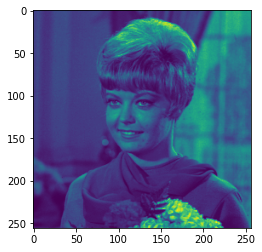

In [14]:
img_m = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, )
plt.imshow(img_gray)

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening 
sebagai berikut:

**Menentukan kernel yang akan digunakan**

IMAGE SHARPEN


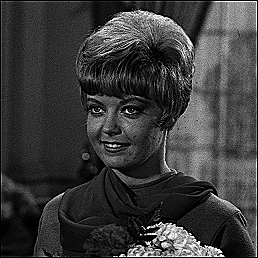

In [23]:
# IMAGE SHARPEN 
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
#memanggil fungsi konvolusi 
print ('IMAGE SHARPEN')
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

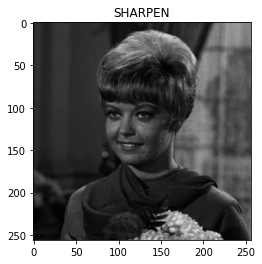

In [19]:
# IMAGE SHARPEN 
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
#memanggil fungsi konvolusi 
plt.title("SHARPEN")
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

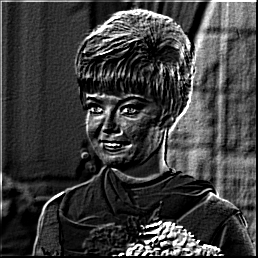

In [6]:
# EMBOSS

kernel_embos = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                           [0, 1, 2]])

cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

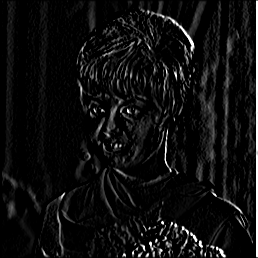

In [7]:
# Left Sobel Edge Detection

kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

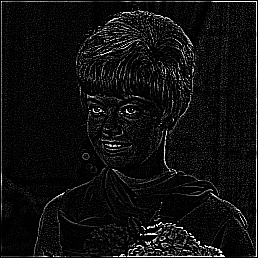

In [8]:
# Canny edge Detection

kernel_Canny = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_Canny, 1, 2))
     

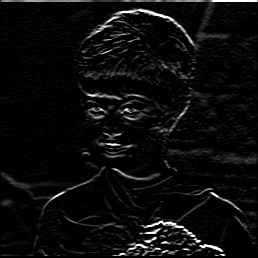

In [15]:
#Prewitt Edge DetectioN
kernel_Prewitt = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_Prewitt, 1, 2))

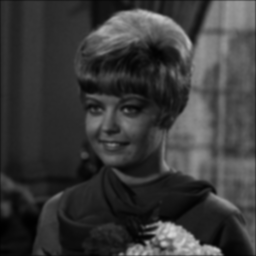

In [17]:
#5x5 Gaussian Blur 
kernel_Gaussian_blur = np.array([[1,4,6,4,1],
                                 [4,16,24,16,4],
                                 [6,24,36,24,6],
                                 [4,16,24,16,4],
                                 [1,4,6,4,1]])* 1/256 
cv2_imshow(convolution2d(img_gray, kernel_Gaussian_blur, 1, 2))

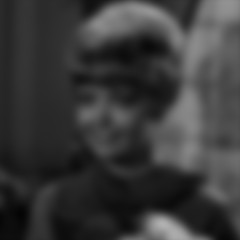

In [9]:
# 21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))
     